In [1]:
# import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# bet of hands
BET_BANKER = "banker"
BET_PLAYER = "player"
BET_TIE = "tie"

# probability occurance of bet of hands
probability_banker = 46
probability_player = 46
probability_tie = 8
# payout ratio
win_payout = 1
tie_payout = 8
# 5% commission for the house
win_commission = 0.05
# each player's initial balance
initial_balance = 10000000

FIG_WIDTH = 16
FIG_HEIGHT = 10

'''
Two players bet on banker and player respectively with different amount
* 2 players play baccarat
* player 1 bet on banker with excessive amount more than player 2
* player 2 bet on player with way less amount
* the probability settings defined in cell "configuration settings"
* this test aims to evaluate the long term result after many rounds (>1000) of playing
'''


'\nTwo players bet on banker and player respectively with different amount\n* 2 players play baccarat\n* player 1 bet on banker with excessive amount more than player 2\n* player 2 bet on player with way less amount\n* the probability settings defined in cell "configuration settings"\n* this test aims to evaluate the long term result after many rounds (>1000) of playing\n'

In [2]:
class Player:
    def __init__(self, name, balance):
        self.name = name
        self.initial_amount = balance
        self.balance = balance
        self.bet = ""
        self.bet_amount = 0
    def place_bet(self, bet, amount):
        self.bet_hand = bet
        self.bet_amount = amount
    def pay_collect(self, result):
        win_loss = 0
        if self.bet_hand == "":
            # player did not bet, no win nor lose
            pass
        elif result == self.bet_hand:
            # player's bet win
            payout = 0
            if result == BET_BANKER:
                payout = win_payout
            elif result == BET_PLAYER:
                payout = win_payout
            elif result == BET_TIE:
                payout = tie_payout
            win = payout * self.bet_amount
            win_loss = win * (1 - win_commission)
        else:
            # player's bet losed
            payout = 0
            if result == BET_BANKER:
                payout = win_payout
            elif result == BET_PLAYER:
                payout = win_payout
            else:
                payout = 0
            win_loss = -1 * payout * self.bet_amount
        self.balance += win_loss
        return win_loss

class Baccarat:
    def __init__(self, player, probability_banker, probability_player, probability_tie):
        self.player = player
        self.probability_banker = probability_banker
        self.probability_player = probability_player
        self.probability_tie = probability_tie
        self.balance = 0
        self.bet_record = []
        self.record_index = 0
    def deal(self):
        num_random = random.randrange(0, 100)
        if num_random < self.probability_banker:
            result = BET_BANKER
        elif num_random < (self.probability_banker + self.probability_player):
            result = BET_PLAYER
        else:
            result = BET_TIE
        return result
    def conclude(self, result):
        profitloss = 0
        for i in player:
            win_loss = player[i].pay_collect(result)
            self.bet_record.append({"match": self.record_index, "result": result, "player": player[i].name, "winloss": win_loss})
            profitloss -= win_loss
        self.balance += profitloss
        self.bet_record.append({"match": self.record_index, "result": result, "player": "house", "winloss": profitloss})
        self.record_index += 1
    def print(self):
        print("result player winloss")
        for record in self.bet_record:
            print("{0} {1} {2}".format(record['result'], record['player'], record['winloss']))
    def df(self):
        df = pd.DataFrame.from_dict(self.bet_record)
        return df

def show_result(bet_record_df):
    # plot balanace
    display(HTML('<h3>All players cumulative balance</h3>'))
    df_winloss = bet_record_df[['match', 'player', 'winloss']]
    df = df_winloss.pivot(index=['match'], columns=['player'], values=['winloss'])
    df_cumsum_all = df.cumsum()
    df_cumsum_all.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
    plt.show()
    # display(HTML('<h3>House cumulative balance</h3>'))
    # df_cumsum_1 = df_cumsum_all['winloss']['house']
    # df_cumsum_1.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
    # plt.show()

    # show statistic
    display(HTML('<h3>Game result statistic</h3>'))
    display(HTML('<h4>Number of matches played</h4>'))
    player_group = bet_record_df.groupby('player')
    num_matches = player_group.get_group('house')['match'].count()
    print(num_matches)
    display(HTML('<h4>Percentage occurence of different result</h4>'))
    print(player_group.get_group('house').value_counts(['result'], normalize=True))
    display(HTML('<h4>Win-Loss after final match</h4>'))
    print(df_cumsum_all['winloss'].iloc[[-1]])
    display(HTML('<h4>Max draw-down</h4>'))
    print(df_cumsum_all['winloss'].min())


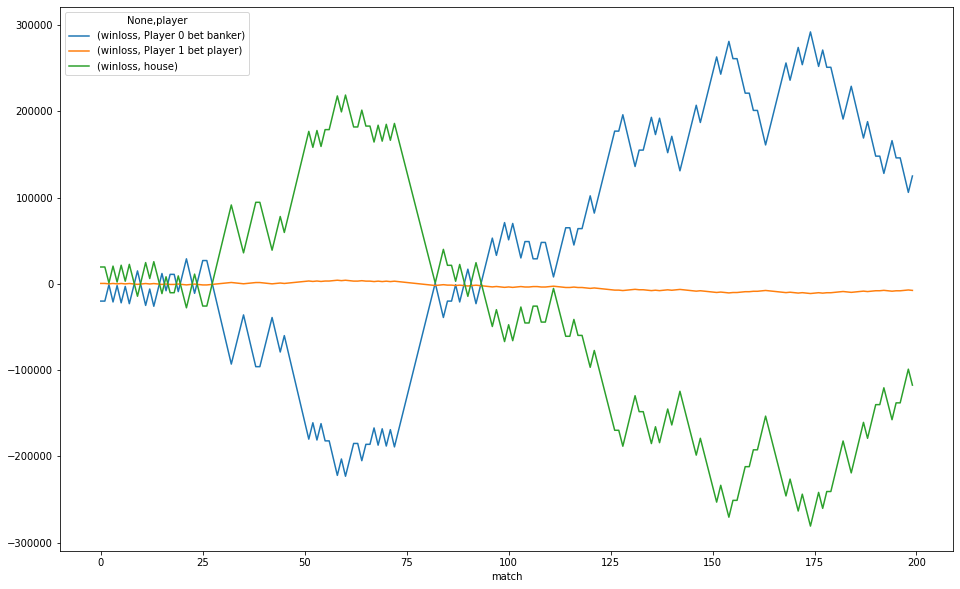

200


result
banker    0.475
player    0.420
tie       0.105
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199                125000.0              -7600.0 -117400.0


player
Player 0 bet banker   -223000.0
Player 1 bet player    -11225.0
house                 -280775.0
dtype: float64


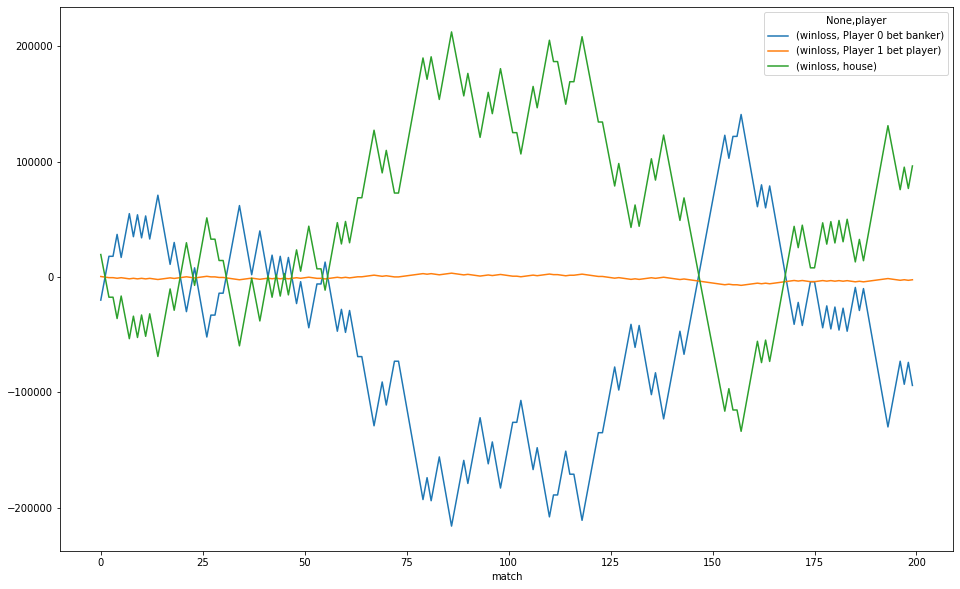

200


result
banker    0.47
player    0.47
tie       0.06
dtype: float64


player  Player 0 bet banker  Player 1 bet player    house
match                                                    
199                -94000.0              -2350.0  96350.0


player
Player 0 bet banker   -216000.0
Player 1 bet player     -7200.0
house                 -133800.0
dtype: float64


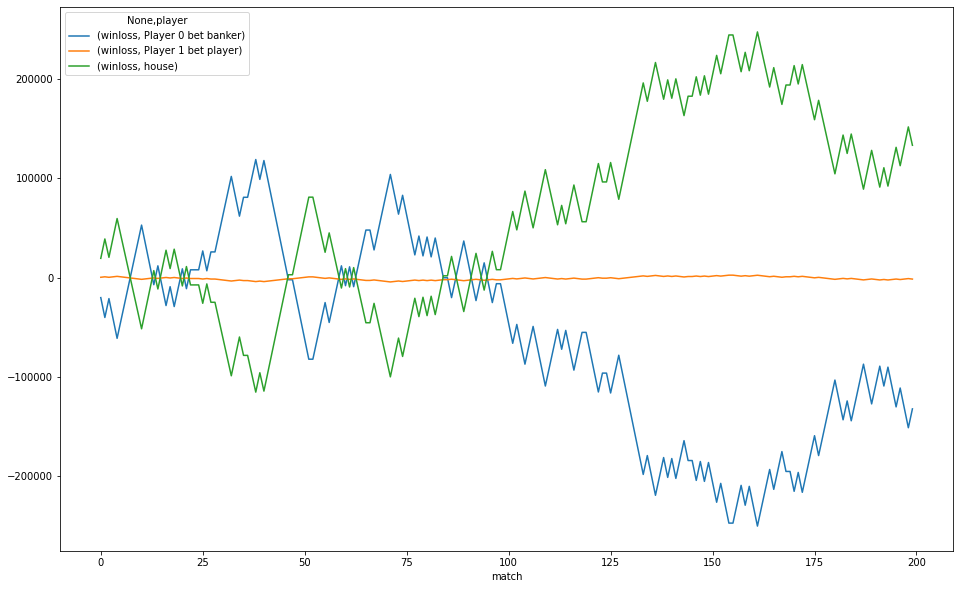

200


result
player    0.47
banker    0.46
tie       0.07
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -132000.0              -1350.0  133350.0


player
Player 0 bet banker   -250000.0
Player 1 bet player     -4225.0
house                 -115150.0
dtype: float64


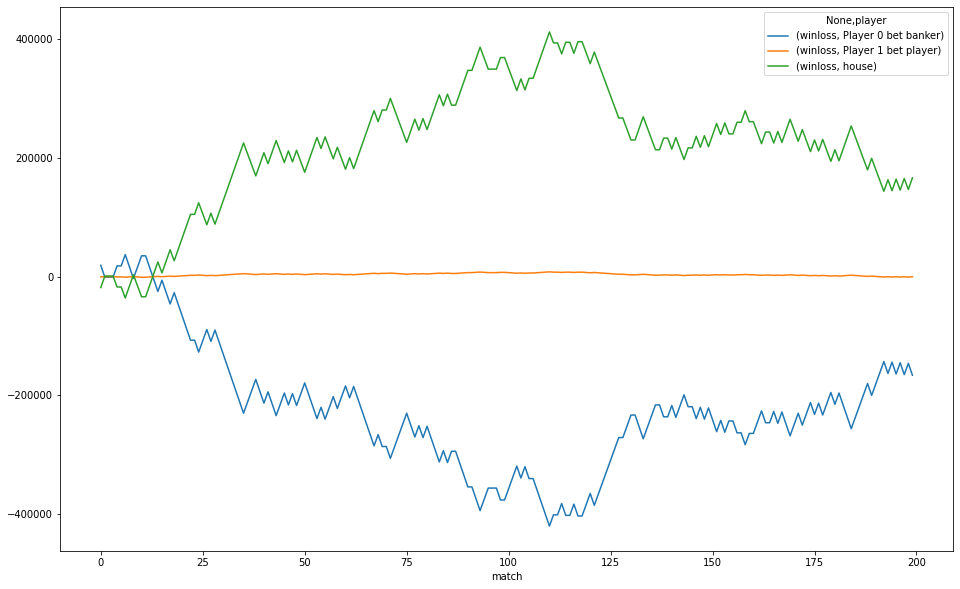

200


result
player    0.45
banker    0.43
tie       0.12
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -166000.0               -250.0  166250.0


player
Player 0 bet banker   -420000.0
Player 1 bet player     -1075.0
house                  -35975.0
dtype: float64


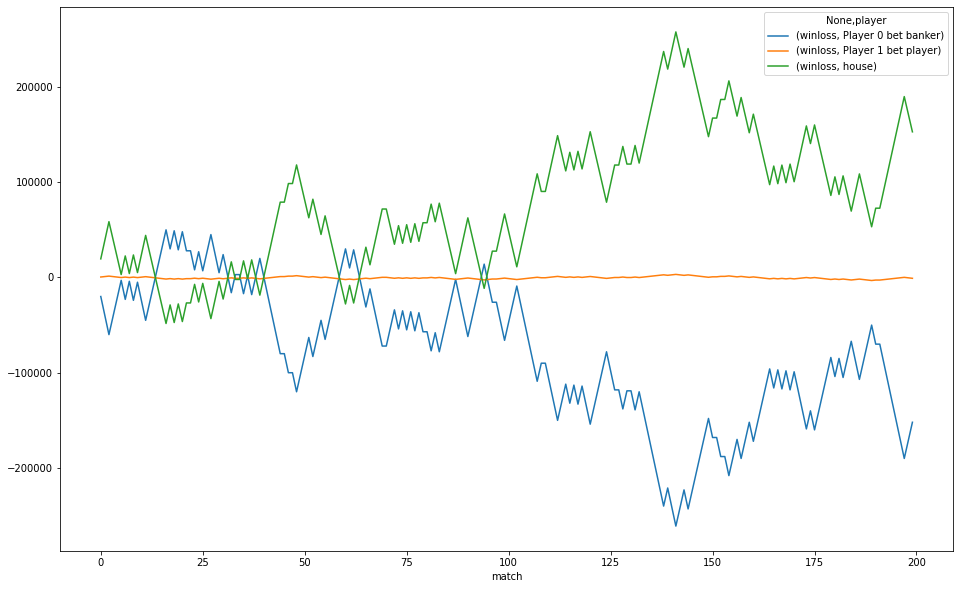

200


result
player    0.475
banker    0.460
tie       0.065
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -152000.0               -875.0  152875.0


player
Player 0 bet banker   -261000.0
Player 1 bet player     -3200.0
house                  -48325.0
dtype: float64


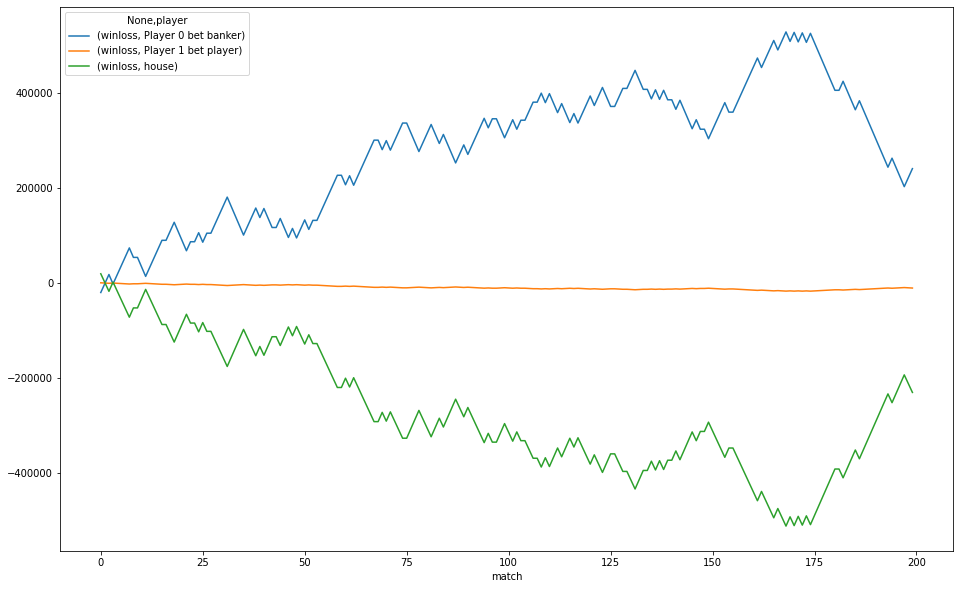

200


result
banker    0.495
player    0.410
tie       0.095
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199                241000.0             -10550.0 -230450.0


player
Player 0 bet banker    -20000.0
Player 1 bet player    -17075.0
house                 -512000.0
dtype: float64


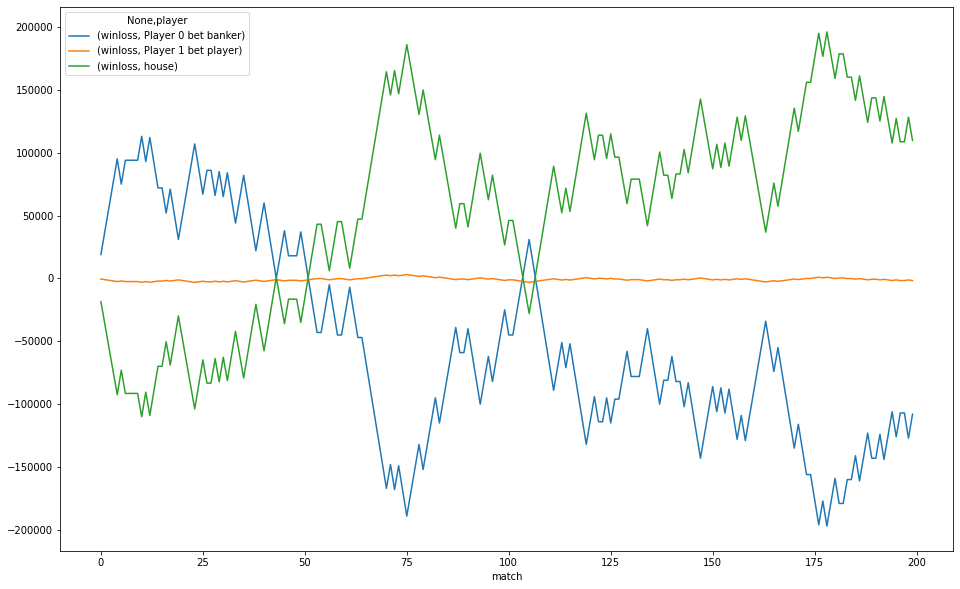

200


result
player    0.445
banker    0.440
tie       0.115
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -108000.0              -1725.0  109725.0


player
Player 0 bet banker   -197000.0
Player 1 bet player     -3175.0
house                 -109975.0
dtype: float64


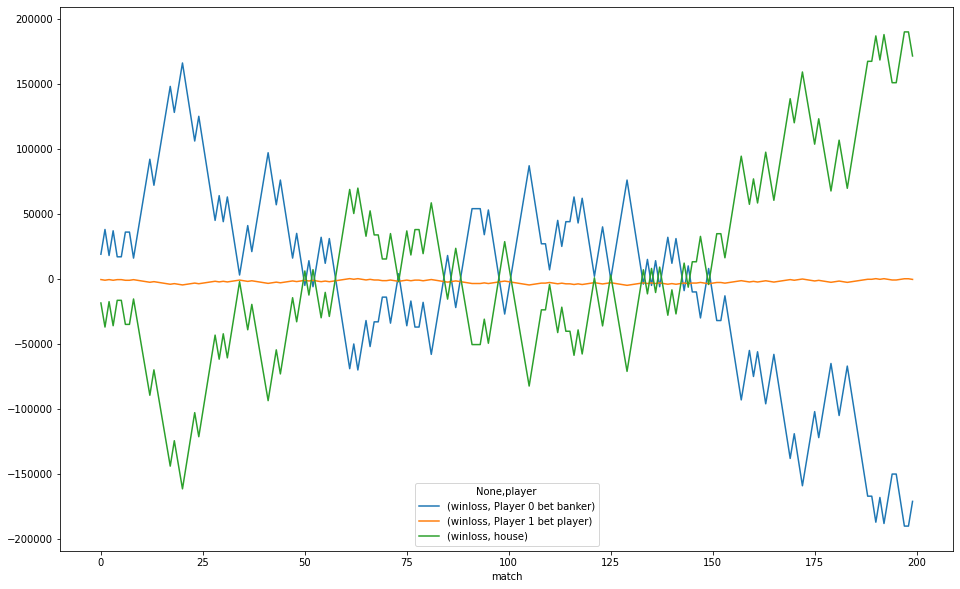

200


result
player    0.475
banker    0.455
tie       0.070
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -171000.0               -375.0  171375.0


player
Player 0 bet banker   -190000.0
Player 1 bet player     -4925.0
house                 -161375.0
dtype: float64


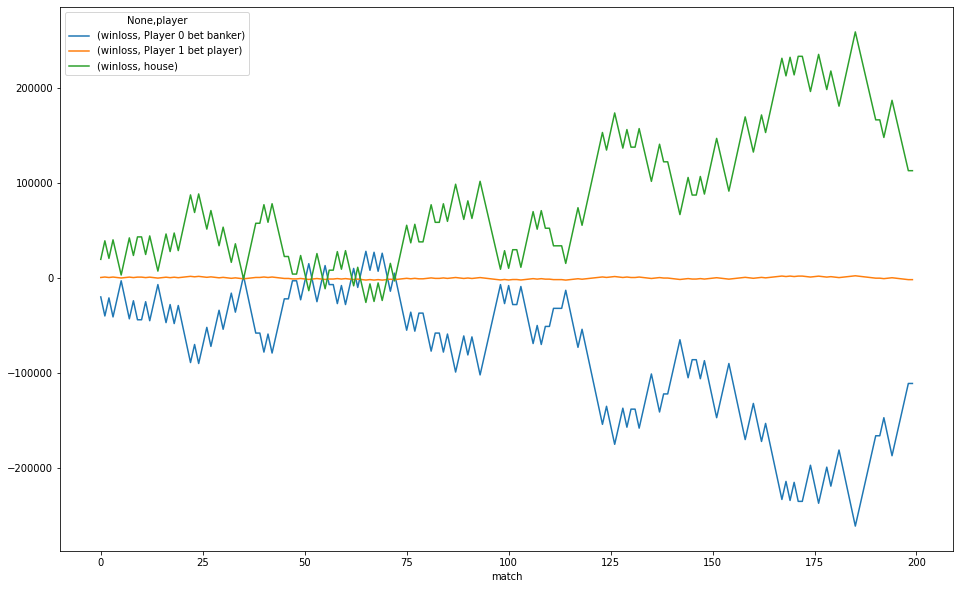

200


result
player    0.460
banker    0.455
tie       0.085
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -111000.0              -1800.0  112800.0


player
Player 0 bet banker   -261000.0
Player 1 bet player     -2275.0
house                  -25775.0
dtype: float64


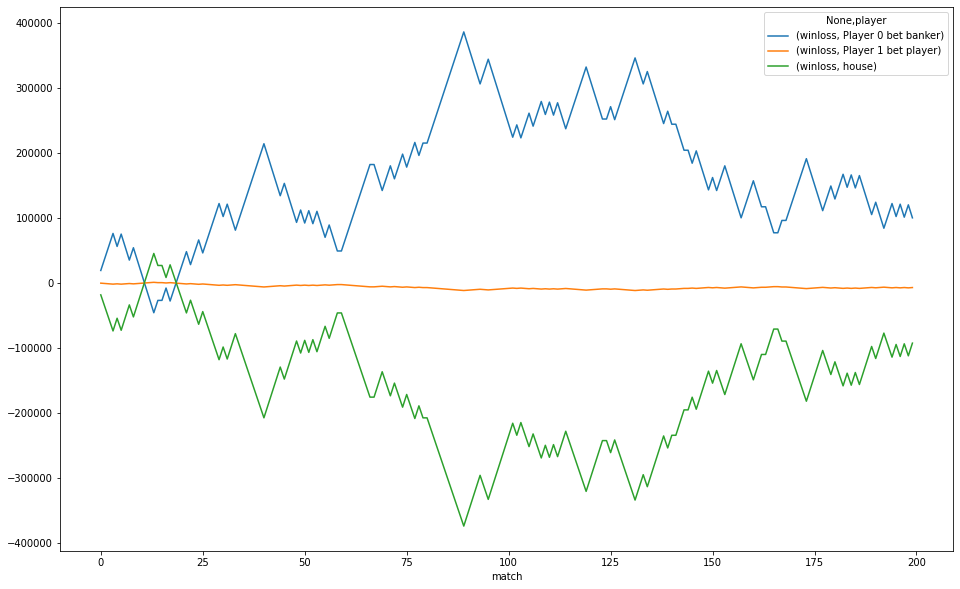

200


result
banker    0.50
player    0.45
tie       0.05
dtype: float64


player  Player 0 bet banker  Player 1 bet player    house
match                                                    
199                100000.0              -7250.0 -92750.0


player
Player 0 bet banker    -46000.0
Player 1 bet player    -11825.0
house                 -374200.0
dtype: float64


In [3]:
# Test case 1
# * define 2 players and their bet hand and amount
# * each player's bet amount is largely different (e.g. one 500, one 20,000)
# Conclusion
# * win-loss seems random
num_test = 10
num_matches = 200
bets = [
    {'bet': BET_BANKER, 'amount': 20000},
    {'bet': BET_PLAYER, 'amount': 500},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 1 - Two player different bet ammount comparison:</h1>'))
for imatch, num_matches in enumerate(test_matches):
    display(HTML('<h2>Match [{0}]:</h2>'.format(imatch)))
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    bet_record_df = baccarat.df()
    show_result(bet_record_df)


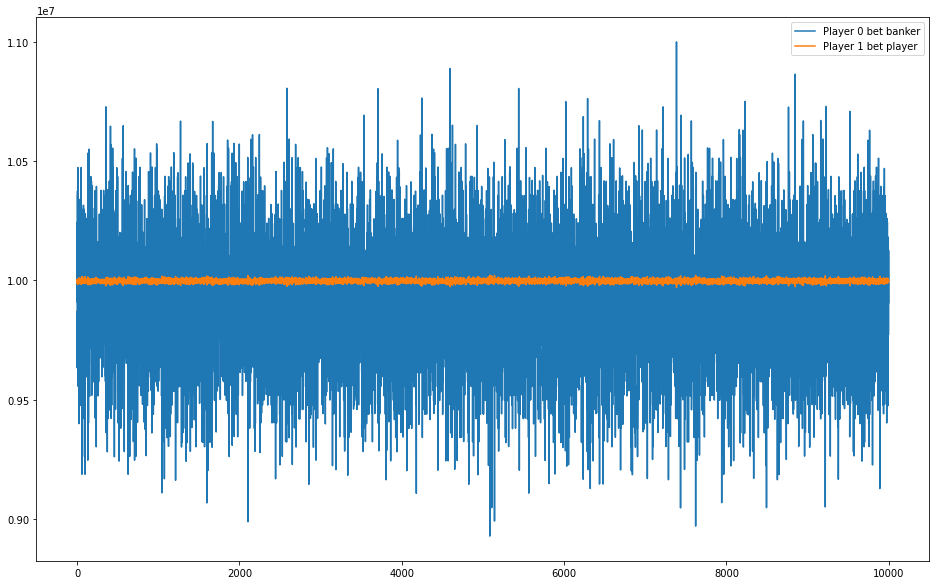

Player 0 bet banker  Player 1 bet player
count         1.000000e+04         1.000000e+04
mean          9.911762e+06         9.997608e+06
std           2.648802e+05         6.621236e+03
min           8.929000e+06         9.970375e+06
25%           9.733000e+06         9.993250e+06
50%           9.910000e+06         9.997650e+06
75%           1.008600e+07         1.000208e+07
max           1.099900e+07         1.002198e+07

In [4]:
# Test case 2
# * define 2 players and their bet hand and amount
# * each player's bet amount is largely different (e.g. one 500, one 20,000)
# * increase the sample to very large to see if there is any pattern
num_test = 10 * 1000
num_matches = 200
bets = [
    {'bet': BET_BANKER, 'amount': 20000},
    {'bet': BET_PLAYER, 'amount': 500},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 2 - Two player different bet ammount large samples:</h1>'))
playerWinLoss = []
for imatch, num_matches in enumerate(test_matches):
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    test_result = {}
    for i in player:
        test_result[player[i].name] = player[i].balance
    playerWinLoss.append(test_result)
df = pd.DataFrame.from_dict(playerWinLoss)
df.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.show()
df.describe()


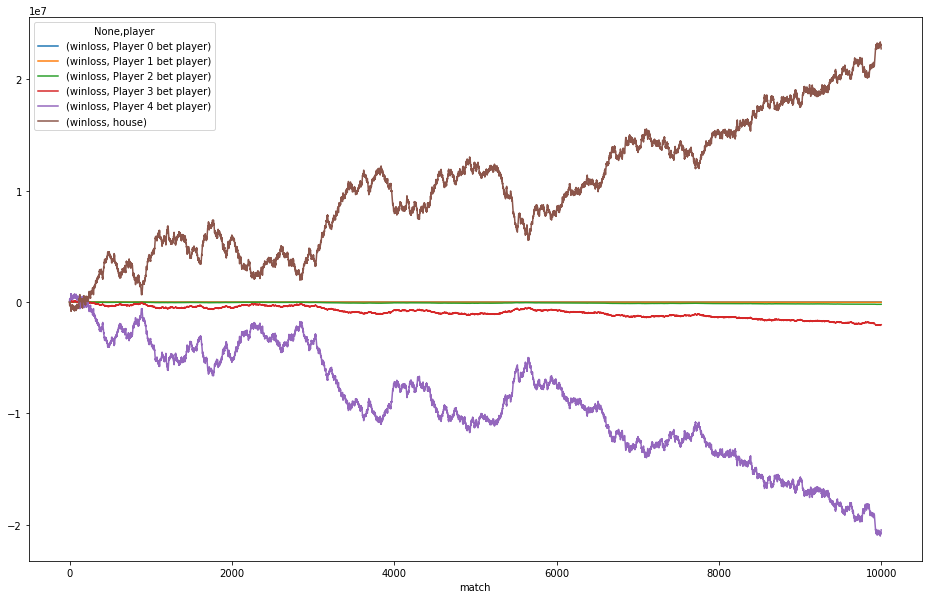

10000


result
player    0.4615
banker    0.4589
tie       0.0796
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2047.5             -20475.0            -204750.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2047500.0          -20475000.0  22749772.5  


player
Player 0 bet player       -2103.5
Player 1 bet player      -21035.0
Player 2 bet player     -210350.0
Player 3 bet player    -2103500.0
Player 4 bet player   -21035000.0
house                   -816658.5
dtype: float64


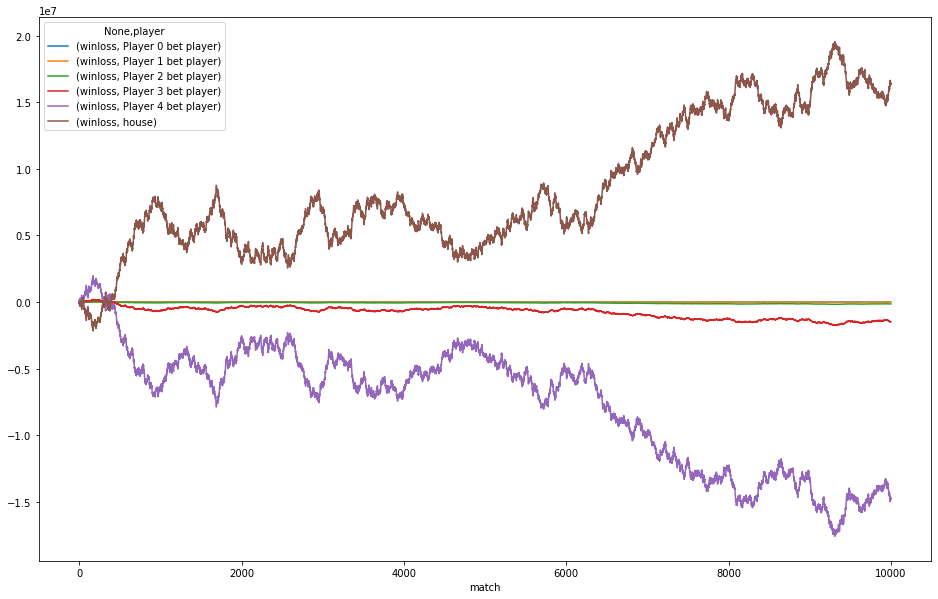

10000


result
player    0.4620
banker    0.4537
tie       0.0843
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1480.0             -14800.0            -148000.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1480000.0          -14800000.0  16444280.0  


player
Player 0 bet player       -1758.5
Player 1 bet player      -17585.0
Player 2 bet player     -175850.0
Player 3 bet player    -1758500.0
Player 4 bet player   -17585000.0
house                  -2155534.0
dtype: float64


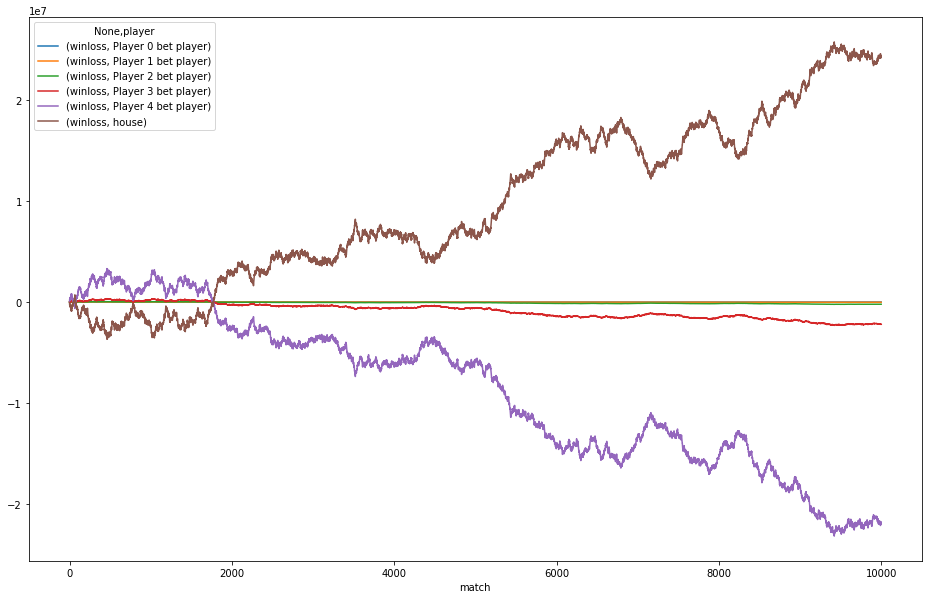

10000


result
player    0.4621
banker    0.4610
tie       0.0769
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2200.5             -22005.0            -220050.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2200500.0          -22005000.0  24449755.5  


player
Player 0 bet player       -2323.0
Player 1 bet player      -23230.0
Player 2 bet player     -232300.0
Player 3 bet player    -2323000.0
Player 4 bet player   -23230000.0
house                  -3683296.5
dtype: float64


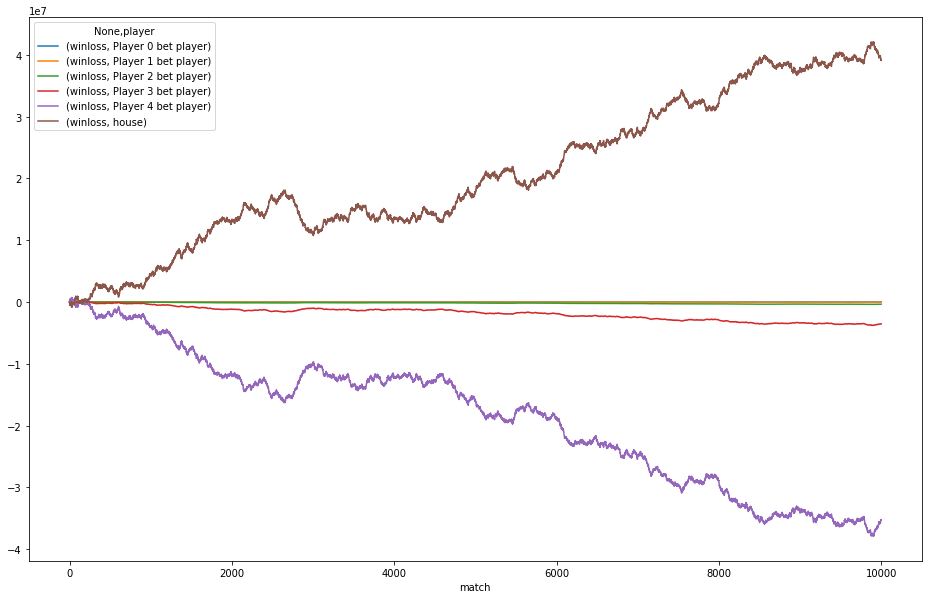

10000


result
banker    0.4671
player    0.4546
tie       0.0783
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -3523.0             -35230.0            -352300.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -3523000.0          -35230000.0  39144053.0  


player
Player 0 bet player       -3786.0
Player 1 bet player      -37860.0
Player 2 bet player     -378600.0
Player 3 bet player    -3786000.0
Player 4 bet player   -37860000.0
house                   -794436.5
dtype: float64


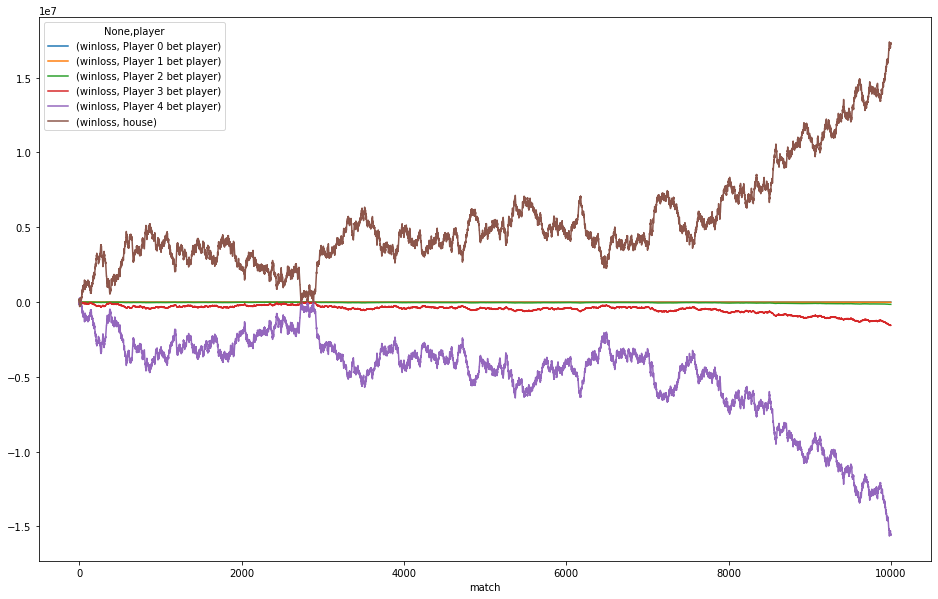

10000


result
player    0.4620
banker    0.4545
tie       0.0835
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1560.0             -15600.0            -156000.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1560000.0          -15600000.0  17333160.0  


player
Player 0 bet player       -1565.5
Player 1 bet player      -15655.0
Player 2 bet player     -156550.0
Player 3 bet player    -1565500.0
Player 4 bet player   -15655000.0
house                   -305552.5
dtype: float64


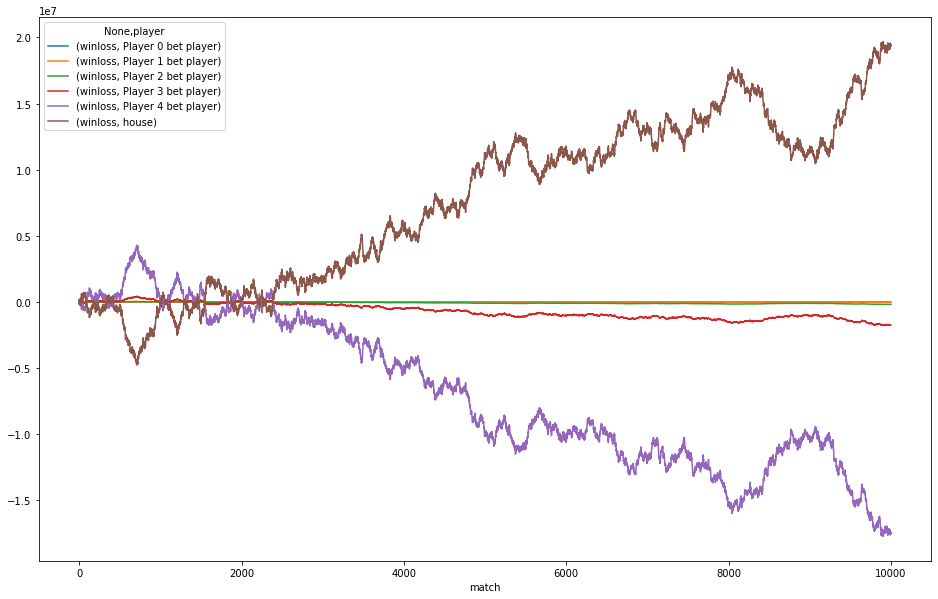

10000


result
player    0.4624
banker    0.4567
tie       0.0809
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1742.0             -17420.0            -174200.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1742000.0          -17420000.0  19355362.0  


player
Player 0 bet player       -1769.5
Player 1 bet player      -17695.0
Player 2 bet player     -176950.0
Player 3 bet player    -1769500.0
Player 4 bet player   -17695000.0
house                  -4755508.0
dtype: float64


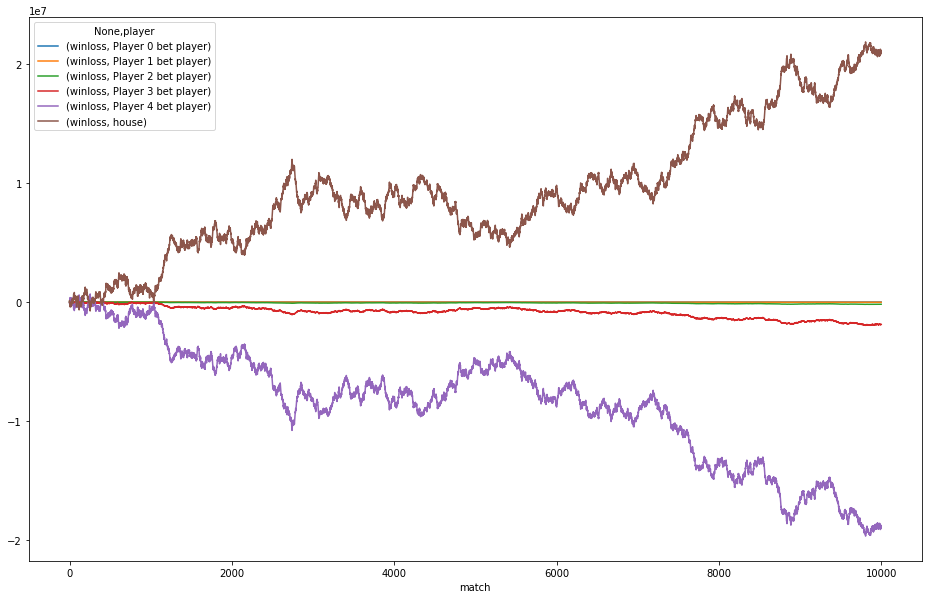

10000


result
player    0.4605
banker    0.4563
tie       0.0832
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1882.5             -18825.0            -188250.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1882500.0          -18825000.0  20916457.5  


player
Player 0 bet player       -1964.5
Player 1 bet player      -19645.0
Player 2 bet player     -196450.0
Player 3 bet player    -1964500.0
Player 4 bet player   -19645000.0
house                   -749992.5
dtype: float64


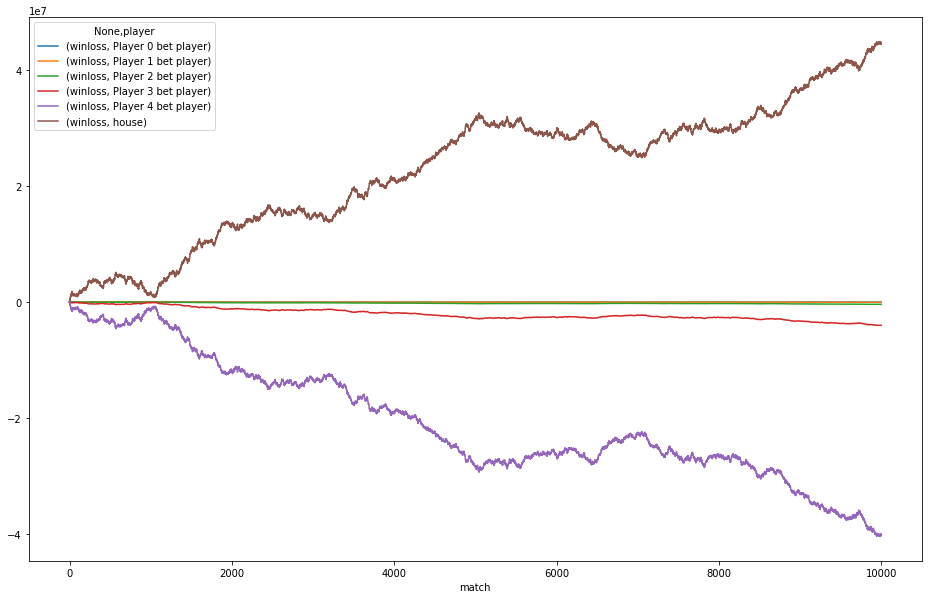

10000


result
banker    0.4693
player    0.4516
tie       0.0791
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -4028.0             -40280.0            -402800.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -4028000.0          -40280000.0  44755108.0  


player
Player 0 bet player       -4035.0
Player 1 bet player      -40350.0
Player 2 bet player     -403500.0
Player 3 bet player    -4035000.0
Player 4 bet player   -40350000.0
house                         0.0
dtype: float64


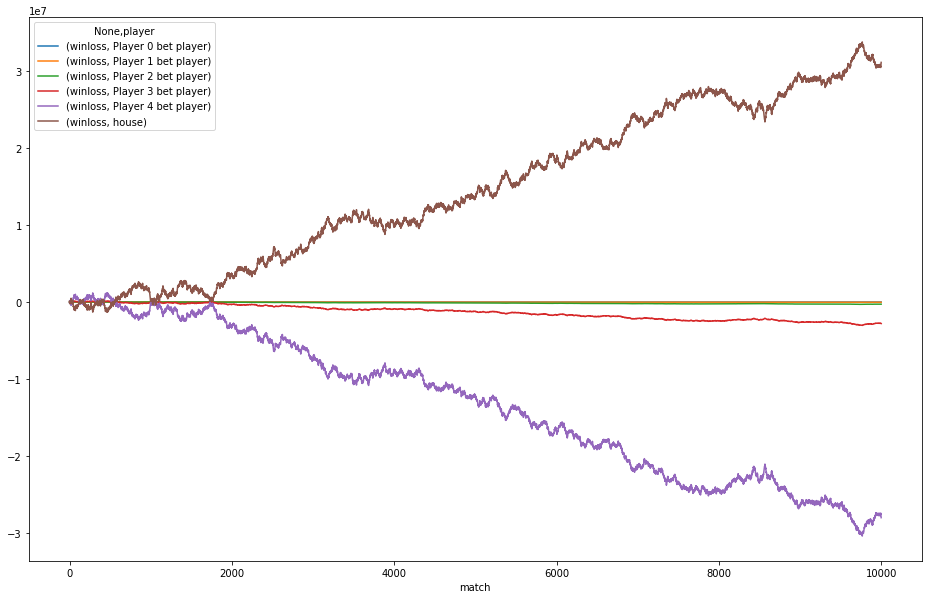

10000


result
banker    0.4619
player    0.4567
tie       0.0814
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2803.5             -28035.0            -280350.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2803500.0          -28035000.0  31149688.5  


player
Player 0 bet player       -3043.0
Player 1 bet player      -30430.0
Player 2 bet player     -304300.0
Player 3 bet player    -3043000.0
Player 4 bet player   -30430000.0
house                  -1316653.5
dtype: float64


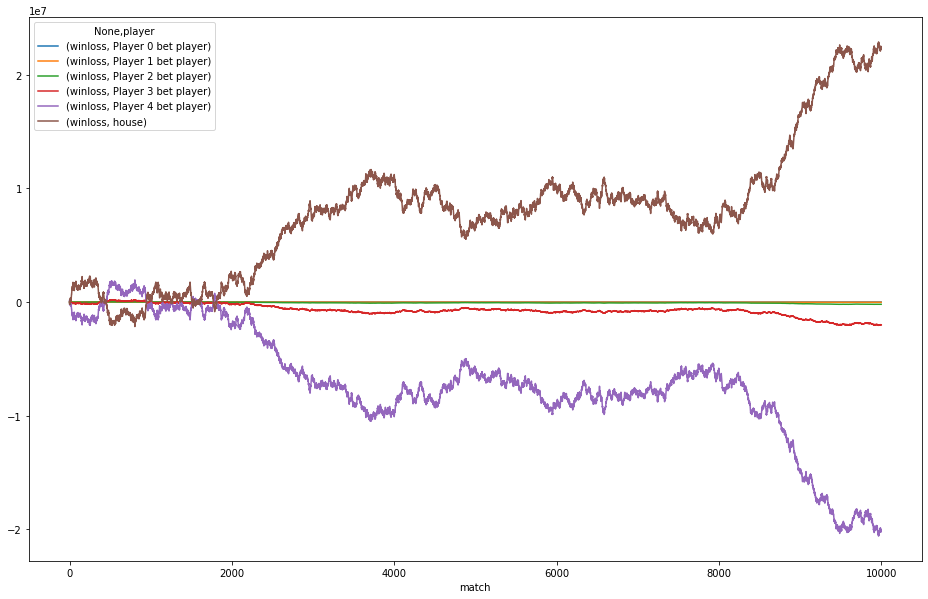

10000


result
player    0.4618
banker    0.4588
tie       0.0794
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2009.0             -20090.0            -200900.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2009000.0          -20090000.0  22321999.0  


player
Player 0 bet player       -2060.0
Player 1 bet player      -20600.0
Player 2 bet player     -206000.0
Player 3 bet player    -2060000.0
Player 4 bet player   -20600000.0
house                  -2161089.5
dtype: float64


In [5]:
# Test case 2
# * define many players and their bet hand and amount
# * each player's bet amount is different in order to show their relationship
# Conclusion
num_test = 10
num_matches = 10000
bets = [
    {'bet': BET_PLAYER, 'amount': 10},
    {'bet': BET_PLAYER, 'amount': 100},
    {'bet': BET_PLAYER, 'amount': 1000},
    {'bet': BET_PLAYER, 'amount': 10000},
    {'bet': BET_PLAYER, 'amount': 100000},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 3 - Different player different bet ammount comparison:</h1>'))
for imatch, num_matches in enumerate(test_matches):
    display(HTML('<h2>Match [{0}]:</h2>'.format(imatch)))
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    bet_record_df = baccarat.df()
    show_result(bet_record_df)


In [6]:
display(HTML('<h1>All tests finished.</h1>'))
